In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!tar -xvf fer2013.tar.gz

  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 3.91MB/s]
 88% 81.0M/92.0M [00:00<00:00, 88.3MB/s]
100% 92.0M/92.0M [00:00<00:00, 134MB/s] 
fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('fer2013/fer2013.csv')


In [0]:
emotion = np.array(df.emotion,dtype='int')
emotion_dict = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

In [0]:
angry = df.loc[df.emotion == 0]
disgust = df.loc[df.emotion == 1]
fear = df.loc[df.emotion == 2]
happy = df.loc[df.emotion == 3]
sad = df.loc[df.emotion == 4]
surprise = df.loc[df.emotion == 5]
neutral = df.loc[df.emotion == 6]

In [55]:
print(len(angry),len(disgust),len(fear),len(happy),len(sad),len(surprise),len(neutral))

4953 547 5121 8989 6077 4002 6198


In [0]:
angry = pd.concat([angry,disgust])
angry.emotion = 0  # angry emotion label = 0

In [57]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in angry.pixels[:]])
arr=np.array(lst)
angry1 = arr.reshape((-1,48,48,1))
print(angry1.shape)
angry2 = np.flip(angry1[:,:,:,:],0)
print(angry2.shape)
angry = np.concatenate((angry1,angry2),0)
print(angry.shape)

(5500, 48, 48, 1)
(5500, 48, 48, 1)
(11000, 48, 48, 1)


In [0]:
y_angry = np.zeros((11000,))
y_angry[:] = 0


In [59]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in happy.pixels[:]])
arr=np.array(lst)
happy1 = arr.reshape((-1,48,48,1))
print(happy1.shape)
happy2 = np.flip(happy1[:,:,:,:],0)
print(happy2.shape)
happy = np.concatenate((happy1,happy2),0)
print(happy.shape)

(8989, 48, 48, 1)
(8989, 48, 48, 1)
(17978, 48, 48, 1)


In [0]:
y_happy = np.zeros((17978,))
y_happy[:] = 1

In [61]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in neutral.pixels[:]])
arr=np.array(lst)
neutral1 = arr.reshape((-1,48,48,1))
print(neutral1.shape)
neutral2 = np.flip(neutral1[:,:,:,:],0)
print(neutral2.shape)
neutral = np.concatenate((neutral1,neutral2),0)
print(neutral.shape)

(6198, 48, 48, 1)
(6198, 48, 48, 1)
(12396, 48, 48, 1)


In [0]:
y_neutral = np.zeros((12396,))
y_neutral[:] = 2

In [15]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in sad.pixels[:]])
arr=np.array(lst)
sad1 = arr.reshape((-1,48,48,1))
print(sad1.shape)
sad2 = np.flip(sad1[:,:,:,:],0)
print(sad2.shape)
sad = np.concatenate((sad1,sad2),0)
print(sad.shape)

(6077, 48, 48, 1)
(6077, 48, 48, 1)
(12154, 48, 48, 1)


In [0]:
y_sad = np.zeros((12154,))
y_sad[:] = 3

In [63]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in surprise.pixels[:]])
arr=np.array(lst)
surprise1 = arr.reshape((-1,48,48,1))
print(surprise1.shape)
surprise2 = np.flip(surprise1[:,:,:,:],0)
print(surprise2.shape)
surprise = np.concatenate((surprise1,surprise2),0)
print(surprise.shape)

(4002, 48, 48, 1)
(4002, 48, 48, 1)
(8004, 48, 48, 1)


In [0]:
y_surprise = np.zeros((8004,))
y_surprise[:] = 3 # trueeeeeeeeeee

In [65]:
X_h_n_sad_ang = np.concatenate((happy,neutral,surprise,angry),0)
print(X_h_n_sad_ang.shape)
Y_h_n_sad_ang = np.concatenate((y_happy,y_neutral,y_surprise,y_angry),0)
print(Y_h_n_sad_ang.shape)

(49378, 48, 48, 1)
(49378,)


In [0]:
randomize = np.arange(len(Y_h_n_sad_ang))
np.random.shuffle(randomize)
X_train = X_h_n_sad_ang[randomize]
Y_train = Y_h_n_sad_ang[randomize]

In [67]:
print(X_train.shape,Y_train.shape)

(49378, 48, 48, 1) (49378,)


In [0]:
np.save('X_save.npy',X_train)
np.save('Y_save.npy',Y_train)
files.download('X_save.npy')
files.download('Y_save.npy')

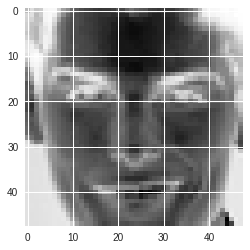

In [0]:
x=happy[185,:,:,0]
x.shape
plt.imshow(x)

In [0]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in df.pixels[:30000]])
arr=np.array(lst)
X_train = arr.reshape((30000,48,48,1))

In [0]:
lst = []
lst.append([np.array(l.split(),dtype='int') for l in df.pixels[30000:]])
arr=np.array(lst)
X_test = arr.reshape((5887,48,48,1))

In [0]:
plt.imshow(angry[6,:,:,0],1)

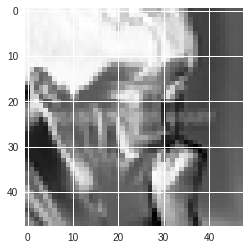

In [0]:
plt.imshow(X_train[3,:,:,0])

In [0]:
plt.imshow(X_)

In [27]:
print(X_train.shape,X_test.shape)

NameError: ignored

In [50]:
!pip3 install face_recognition
import face_recognition

  Using cached https://files.pythonhosted.org/packages/3f/ed/ad9a28042f373d4633fc8b49109b623597d6f193d3bbbef7780a5ee8eef2/face_recognition-1.2.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/8d/e4ddf60452e2fb1ce3164f774e68968b3f110f1cb4cd353235d56875799e/dlib-19.16.0.tar.gz
  Running setup.py bdist_wheel for dlib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ce/f9/bc/1c51cd0b40a2b5dfd46ab79a73832b41e7c3aa918a508154f0
Successfully built dlib


In [0]:
import cv2

In [0]:
X_save = np.load('X_save.npy')
Y_save = np.load('Y_save.npy')


X_train = np.zeros((Y_save.shape[0],128))
for i,img in enumerate(X_save[:,:,:,0]):
    cv2.imwrite('temp.jpg',img)
    img = face_recognition.load_image_file('temp.jpg')
    box = face_recognition.face_locations(img)
    e = face_recognition.face_encodings(img,box)
    if len(e)>0:
        X_train[i] = e[0]
np.save('X_train_encodings_new2.npy',X_train)
files.download('X_train_encodings_new2.npy')

In [70]:
X_train.shape

(49378, 48, 48, 1)

In [28]:
import keras,time
from keras.models import Model
from keras.layers import Activation,Flatten,Dropout,Conv2D,Dense,BatchNormalization,MaxPool2D,Input
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [41]:
Y_train = to_categorical(Y_train,num_classes=4)
print(Y_train.shape)

(53528, 4)


In [42]:
Y_train[5]

array([0., 1., 0., 0.], dtype=float32)

In [45]:
!apt-get install build-essential cmake

!apt-get install libgtk-3-dev

!apt-get install libboost-all-dev
!pip3 install face_recognition
import face_recognition

 \ canceledOperation cancelled by user


ModuleNotFoundError: ignored

In [0]:
!pip3 install face_recognition
import face_recognition

In [0]:
X_save = np.zeros((Y_train.shape[0],128))
for i,img in enumerate(X_train[:,:,:,0]):
    cv2.imwrite('temp.jpg',img)
    img = face_recognition.load_image_file('temp.jpg')
    box = face_recognition.face_locations(img)
    e = face_recognition.face_encodings(img,box)
    if len(e)>0:
        X_save[i] = e[0]
np.save('X_train_encodings.npy',X_train)

In [0]:
Name = "syg-{}".format(int(time.time()))
syg = TensorBoard(log_dir='logs/{}'.format(Name))
                         


In [0]:
inputs = Input(shape=(48,48,1))
X = Conv2D(32,kernel_size=2,activation='relu')(inputs)
X = MaxPool2D(pool_size=(2,2))(X)
X = Conv2D(64,kernel_size=2,activation='relu')(X)
X = MaxPool2D()(X)
X = Dropout(0.5)(X)
X = Flatten()(X)
X = Dense(256,activation='relu')(X)
Y_hat = Dense(7,activation='softmax')(X)


In [0]:
model = Model(inputs=inputs,outputs=Y_hat)


In [0]:
model.compile(optimizer='Adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
__________

In [0]:
model.fit(x=X_train,y=Y_train,batch_size=32,epochs=1,
          callbacks=[syg]
          ,validation_split=0.2)


Train on 24000 samples, validate on 6000 samples
Epoch 1/1
24000/24000 [==============================] - 30s 1ms/step - loss: 12.0618 - acc: 0.2515 - val_loss: 12.1157 - val_acc: 0.2483


In [0]:
_, acc = model.evaluate(X_test,Y_test)
print(acc)

5887/5887 [==============================] - 2s 398us/step
0.1734329879091534
